<a href="https://colab.research.google.com/github/khldsqmr/Visual-Analysis-of-Telecom-Customers-Data/blob/main/Visual%20Analysis%20of%20Telecom%20Customers%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims at visually exploring the Telecom Customers data.

This notebook deals with various graphs and plots to identify trends and insights in the data set, which not only serves the purpose of business reporting but also aid in further analysis using classfication and clustering algorithms.

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

# **Dataset**
Telecom Customers dataset

In [2]:
df = pd.read_csv('telecom_customer_data.csv')

In [3]:
# Displaying the first 5 rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Variable Description:**

| Name                   | Description                                   | Value Type         | Statistical Type    |
| ---------------------- | --------------------------------------------- | ------------------ | ------------------- |
| State                  | State abbreviation (like KS = Kansas)         | String             | Categorical         |
| Account length         | How long the client has been with the company | Numerical          | Quantitative        |
| Area code              | Phone number prefix                           | Numerical          | Categorical         |
| International plan     | International plan (on/off)                   | String, "Yes"/"No" | Categorical/Binary  |
| Voice mail plan        | Voicemail (on/off)                            | String, "Yes"/"No" | Categorical/Binary  |
| Number vmail messages  | Number of voicemail messages                  | Numerical          | Quantitative        |
| Total day minutes      | Total duration of daytime calls               | Numerical          | Quantitative        |
| Total day calls        | Total number of daytime calls                 | Numerical          | Quantitative        |
| Total day charge       | Total charge for daytime services             | Numerical          | Quantitative        |
| Total eve minutes      | Total duration of evening calls               | Numerical          | Quantitative        |
| Total eve calls        | Total number of evening calls                 | Numerical          | Quantitative        |
| Total eve charge       | Total charge for evening services             | Numerical          | Quantitative        |
| Total night minutes    | Total duration of nighttime calls             | Numerical          | Quantitative        |
| Total night calls      | Total number of nighttime calls               | Numerical          | Quantitative        |
| Total night charge     | Total charge for nighttime services           | Numerical          | Quantitative        |
| Total intl minutes     | Total duration of international calls         | Numerical          | Quantitative        |
| Total intl calls       | Total number of international calls           | Numerical          | Quantitative        |
| Total intl charge      | Total charge for international calls          | Numerical          | Quantitative        |
| Customer service calls | Number of calls to customer service           | Numerical          | Categorical/Ordinal |

# **Exploratory Analysis**

To explore about the variables, respective distributions and outliers' detections, we visulize the variables using various plots and charts. As evident from the above table, we have **quantitative** variables, and **Categorical/Ordinal and Binary** variables.

- **Quantitative variables** are the values which can be discrete (integers) or continuous (real numbers). They are ordered numerical values which demonstrate a count or a measurement.

- **Categorical variables** are assigned to a specific category/group, which showcases the qualitative property mainly. These variables take on a fixed number of values. For eg: (*Red / Yellow / Blue*, OR *Yes / No*, etc.)

- **Binary variables** are the categorical variables when there are just two categories. For eg: (*success / failure*)

- **Ordinal variables** are the categorical variables when the values are in orderly manner. For Eg: economic status (*low income / middle income / high income*).



In [15]:
# Lets consider the quantitative variables 'Total day minutes' and 'Total intl calls'
Var1 = ['Total day minutes', 'Total intl calls']
df[Var1].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


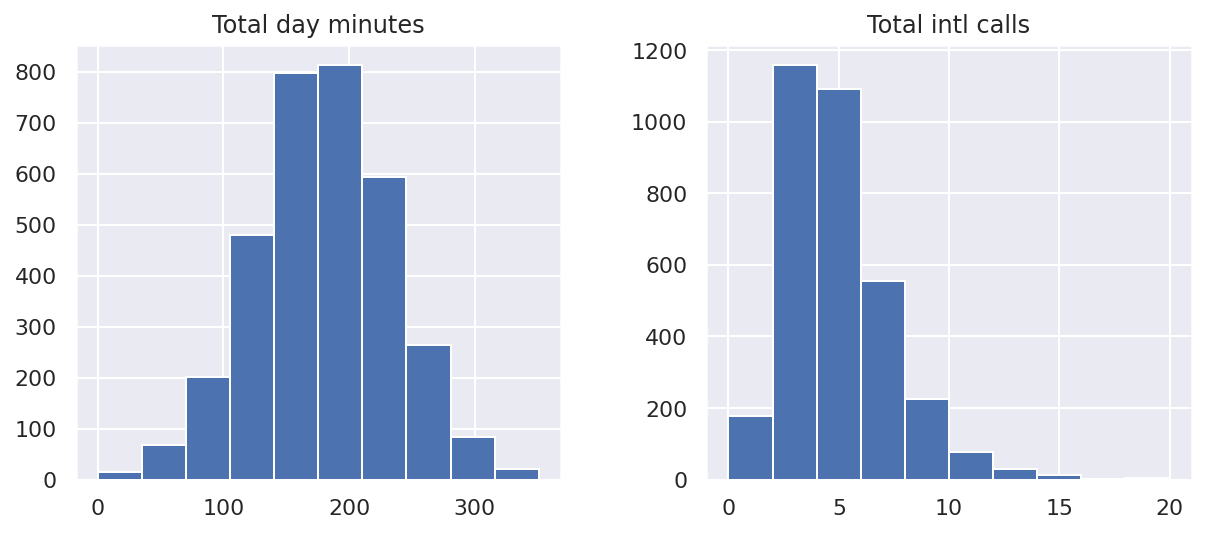

In [16]:
df[Var1].hist(figsize=(10, 4));

Histogram provides information about the underlying distrbution of the variable. It also showcases the skewness associated with the variable.

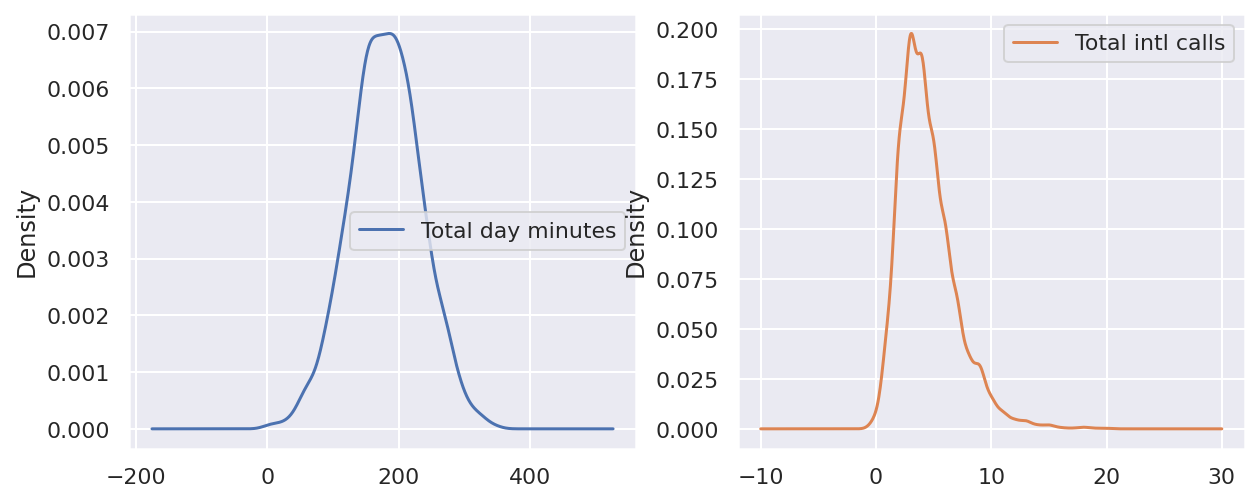

In [17]:
df[Var1].plot(kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4));

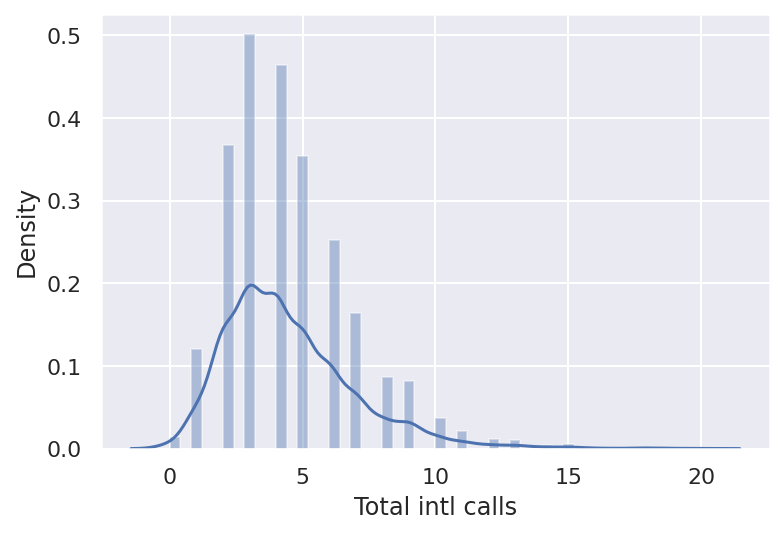

In [18]:
sns.distplot(df['Total intl calls']);

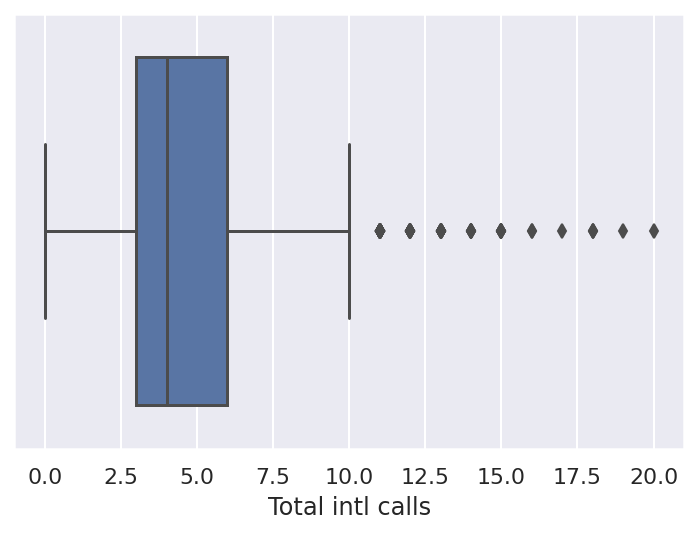

In [19]:
sns.boxplot(x='Total intl calls', data=df);

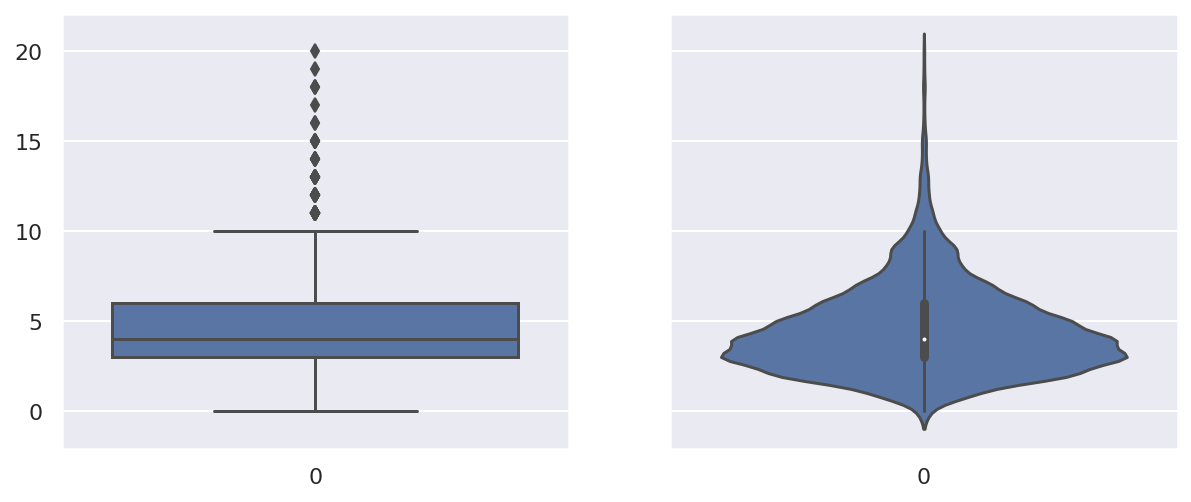

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

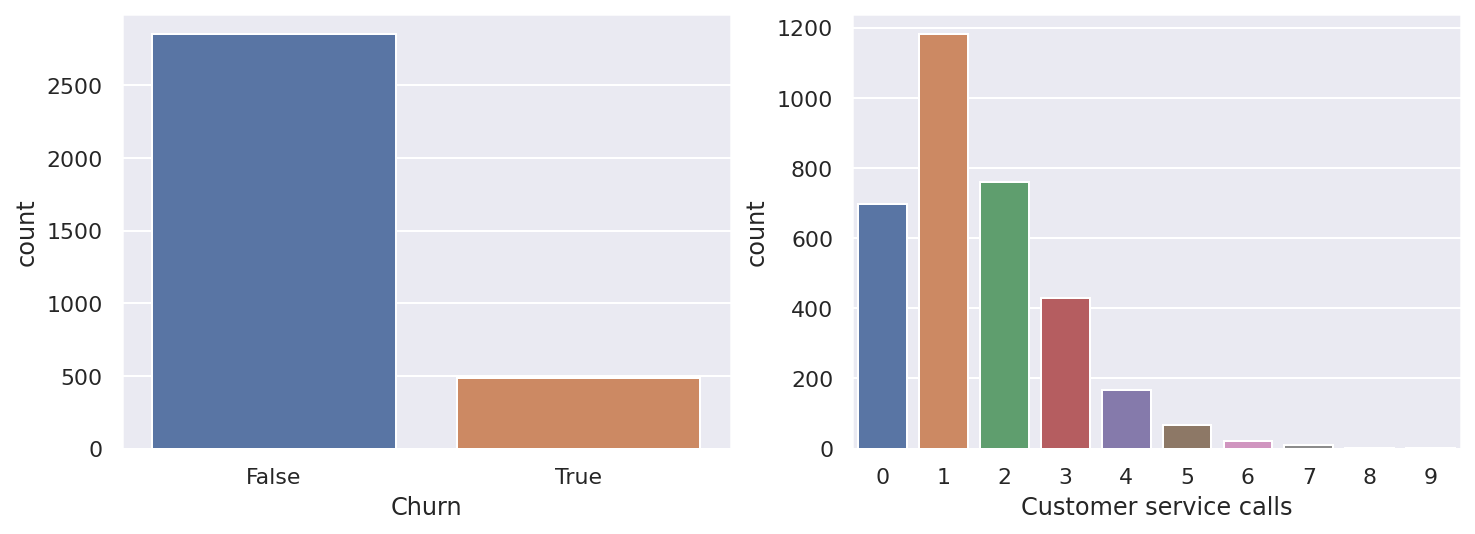

In [21]:
# Lets consider the quantiative/binary variables "Churn" and "Customer service calls" 
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

# **Analyzing multiple variables using the plots**

### **Quantitative VS Quantitative variable**

***Correlation Matrix*** to determine relation between the variables

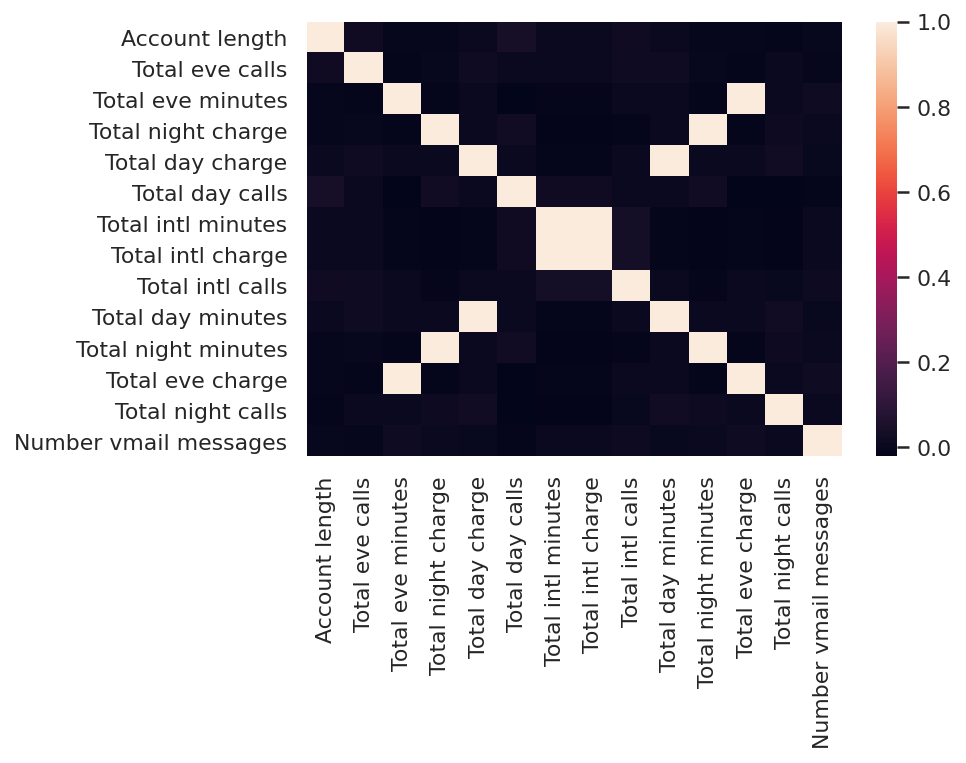

In [22]:
# Correlation Matrix
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))
# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

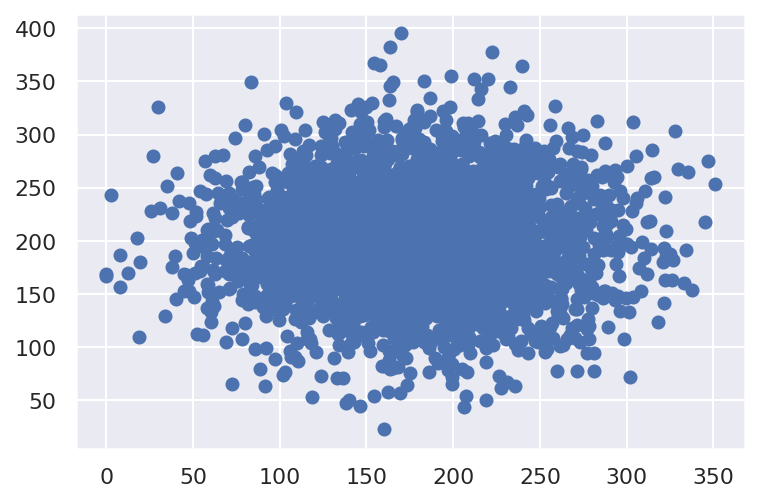

In [24]:
# Scatter Plot
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))
plt.scatter(df['Total day minutes'], df['Total night minutes']);

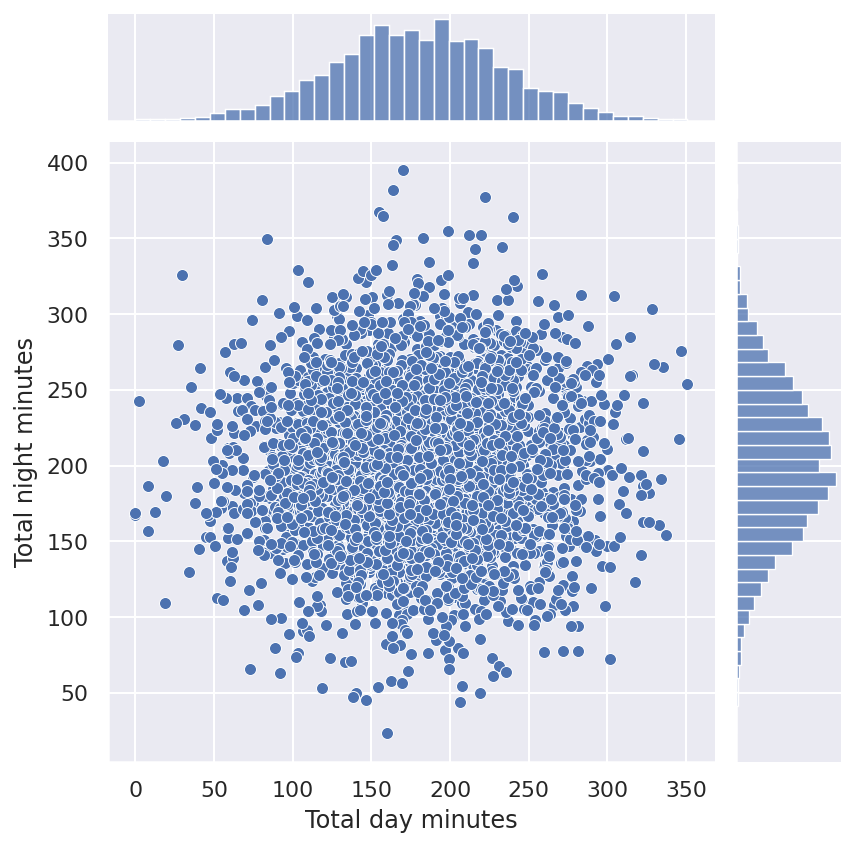

In [25]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter');

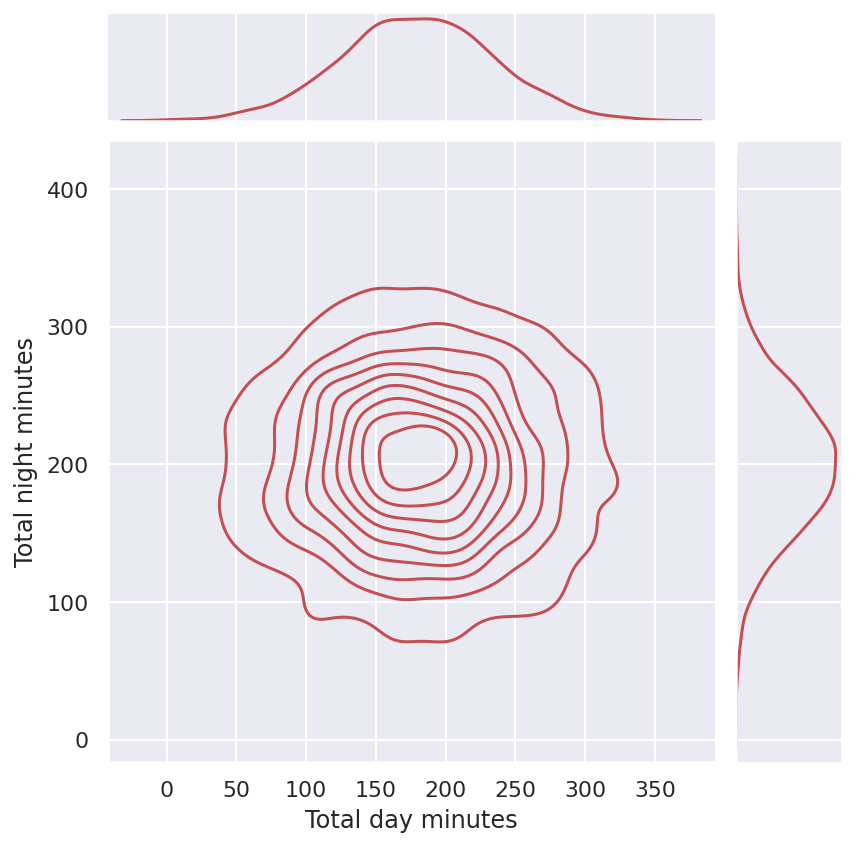

In [27]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df, kind="kde", color="r");

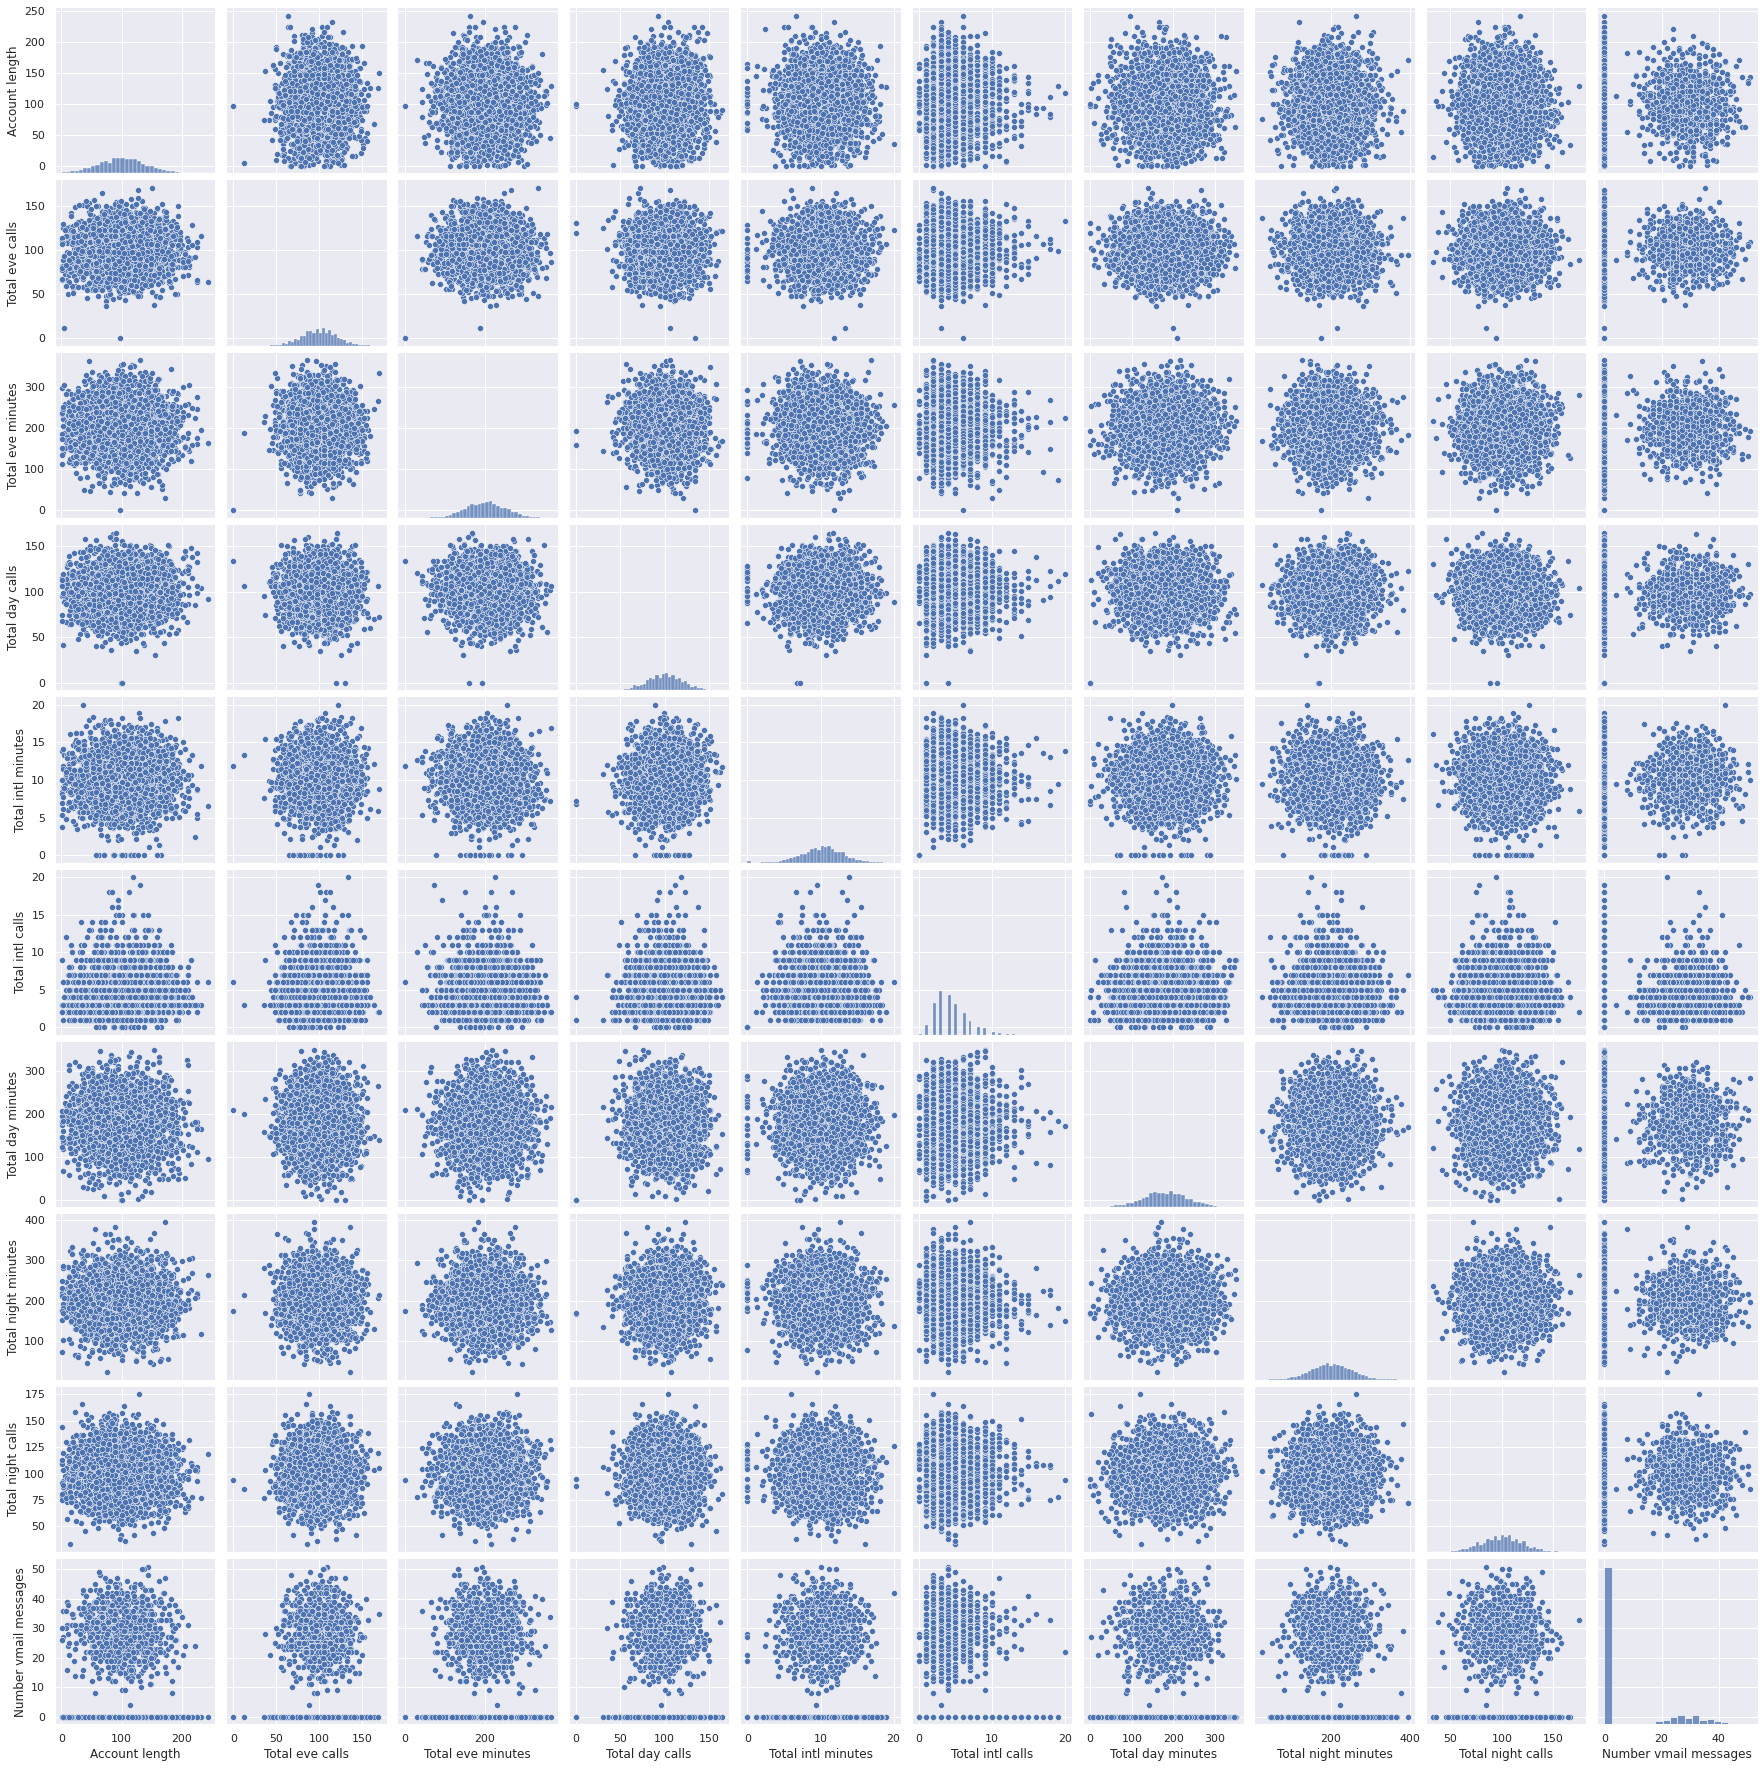

In [29]:
# `pairplot()` may become very slow with the SVG or retina format
sns.pairplot(df[numerical]);

### **Quantitative VS Categorical variables**

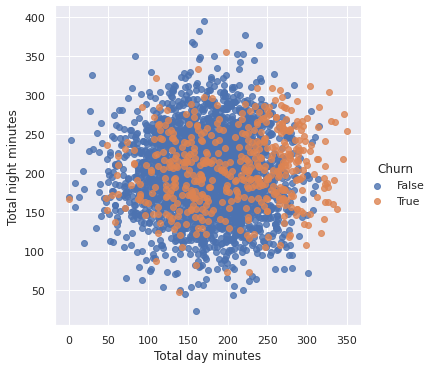

In [30]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False);

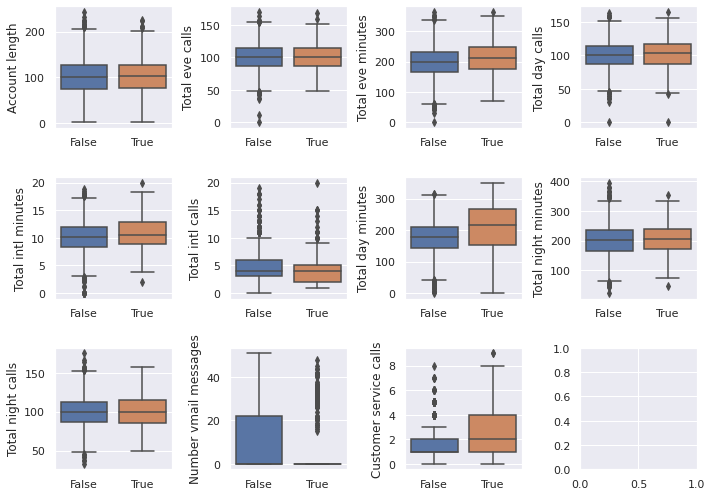

In [31]:
numerical.append('Customer service calls')
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

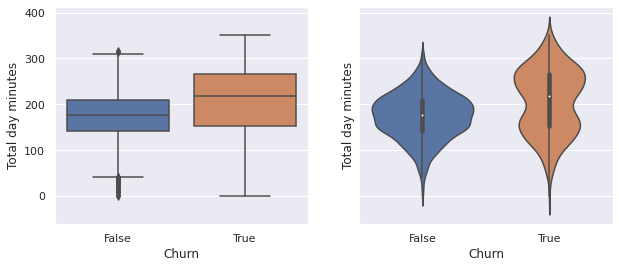

In [32]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

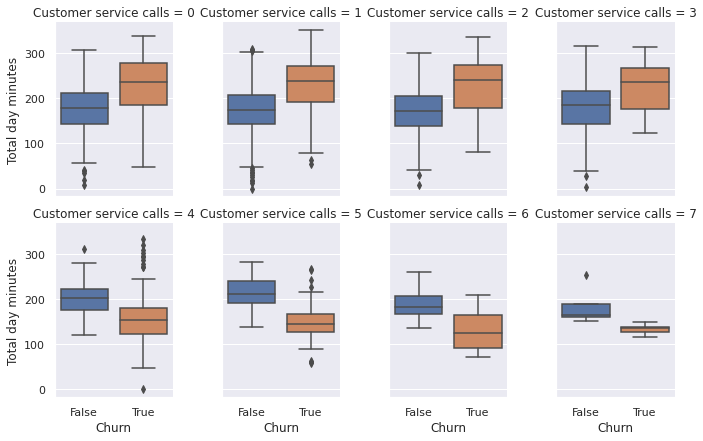

In [33]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

### **Categorical VS Categorical variables**

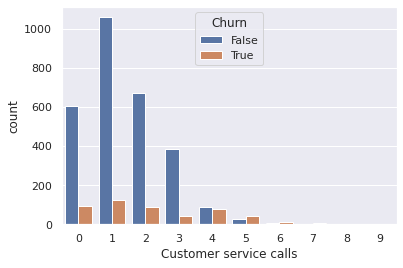

In [34]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

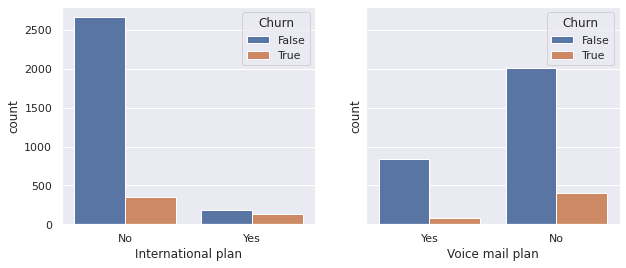

In [35]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

# **Conclusion**

Data visualization is mainly about gathering information about the dataset, as our brain senses the visualizations faster than the actual data. This helps us in performing additional analysis on each of the variables. For eg: Logistics Regression can be used to determine if a new customer would churn based on the predictor variables, and thus, Telecom company could provide discounts/offers to the customer to increase the customer retention rate.
